<connection object at 0x0000029C523F1250; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
       kunta ajoneuvoluokka ensirekisterointopvm
0        179             M1           2010-01-02
1        179             M1           2010-01-02
2        179             M1           2010-01-02
3        179             M1           2010-01-04
4        179             M1           2010-01-04
...      ...            ...                  ...
20276    179             M1           2020-05-07
20277    179             M1           2020-08-20
20278    179             M1           2021-05-18
20279    179             M1           2021-07-23
20280    179             M1           2021-11-01

[20281 rows x 3 columns]
<connection object at 0x0000029C523F2570; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
<connection object at 0x0000029C523F29B0; dsn: 'user=pos

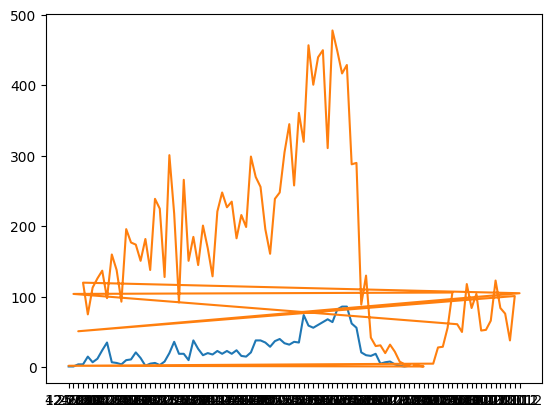

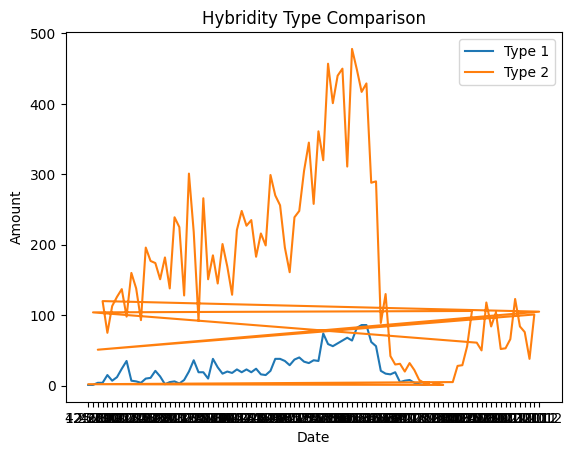

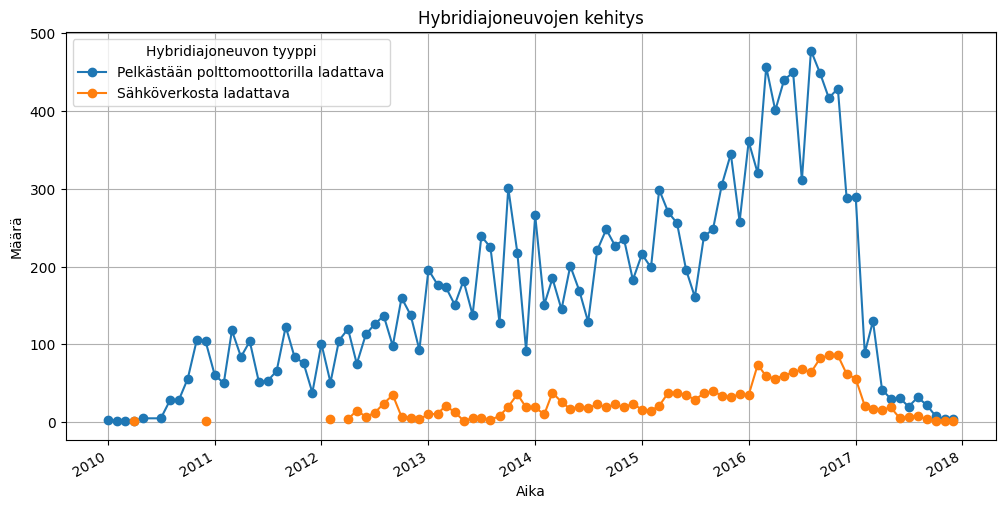

<connection object at 0x0000029C5280B340; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
              vari  maara
0        Valkoinen  29691
1           Harmaa  27258
2            Musta  18938
3         Punainen  15141
4          Sininen  12691
5   Ruskea (beige)   9777
6            Hopea   7651
7           Vihreä   1331
8        Keltainen    714
9    Ei määritelty    584
10         Oranssi    517
11        Violetti    474
12        Monivär.     59
13        Turkoosi     30
<connection object at 0x0000029C5280B450; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
                  kunta  maara
0              Helsinki  10917
1                 Espoo   6942
2                Vantaa   5535
3               Tampere   4889
4                  Oulu   4350
5                 Turku   3986
6             Jyväskylä   2996
7                Kuopio   2629
8

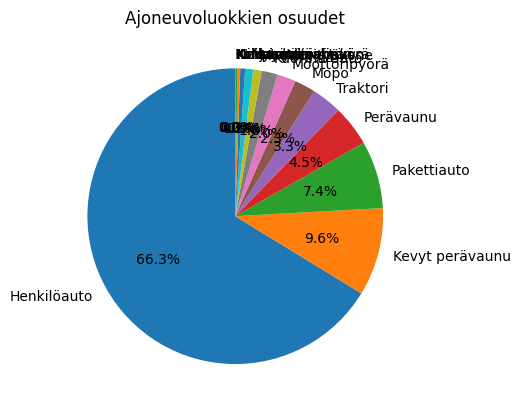

<connection object at 0x0000029C5280B9A0; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
Error while executing SQL query: syntax error at or near "AND"
LINE 4:         AND malli = 'Toyota';
                ^



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koodikirjasto as kk
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

TJTS490 Tietokantajärjestelmät ja data-analytiikka
Harjoitustyö
Susanna Lähde & Aatu Laitinen

Tässä työssä tutkitaan ajoneuvorekisterin dataa. 
Katsotaan millaista tietoa data pitää sisällään:

tähän jotain data explorationia jeejee
esim tutkitaan että millaisia arvoja kolumnit sisältää, onko nulleja (ja mihin ne vaikuttaa) yms yms

Ajatellaan, että olemme autojen jälleenmyyjä ja vaihtoautokauppa. Toimimme Suomen suurimmissa kaupunkikeskuksissa.
Meidän liiketoiminnan jatkuuvuden kannalta tärkeimmät tutkimushypoteesit voisivat olla:
1. Markkinatrendit
2. Alueelliset erot
3. ..?

Tutkitaan ensin markkinatrendejä

In [2]:
df = kk.hybridiautot_luokittain('M1', 2012, 2016)

<connection object at 0x0000029C5280B010; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully


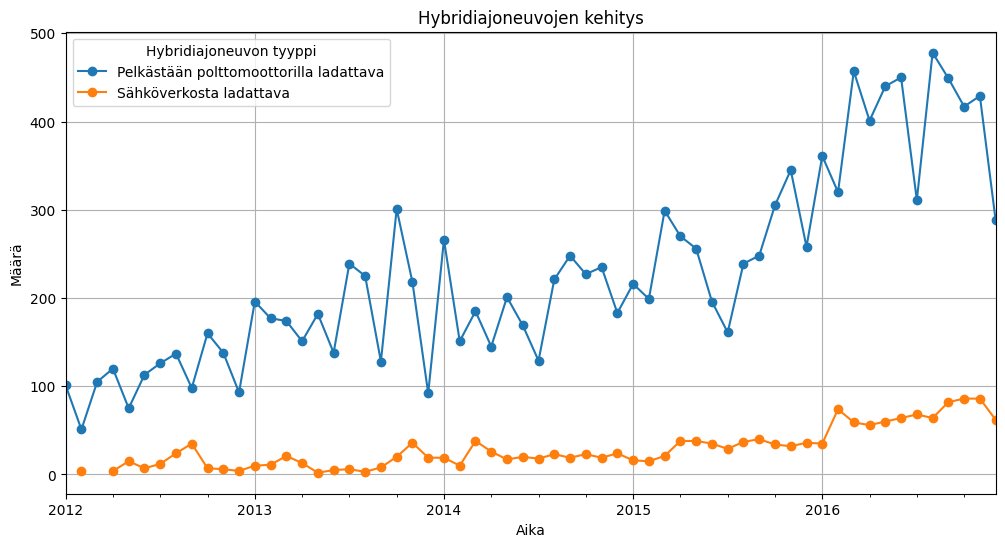

In [3]:
df['date'] = pd.to_datetime(df['vuosi'].astype(str) + '-' + df['kuukausi'].astype(str), format='%Y-%m')
condition = df['hybridityyppi'] == 'Ei määritelty'
df = df[~condition]
df_pivot = df.pivot(index='date', columns='hybridityyppi', values='maara')

fig, ax = plt.subplots(figsize=(12, 6))
df_pivot.plot(ax=ax, marker='o')
plt.title('Hybridiajoneuvojen kehitys')
plt.xlabel('Aika')
plt.ylabel('Määrä')
plt.legend(title='Hybridiajoneuvon tyyppi')
plt.grid(True)
plt.show()


In [15]:
df = kk.ensirekisteroinnit_vuosittain(2022, 2017, 'merkki')

<connection object at 0x0000029C52997BC0; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
        merkki  2017  2018  2019  2020  2021
0        ADRIA     1     1     0     0     0
1   ALFA ROMEO   122    73    35    38    47
..         ...   ...   ...   ...   ...   ...
79       VOLVO  8903  9200  9178  7688  7787
80   WEINSBERG     1     0     0     0     0

[81 rows x 6 columns]


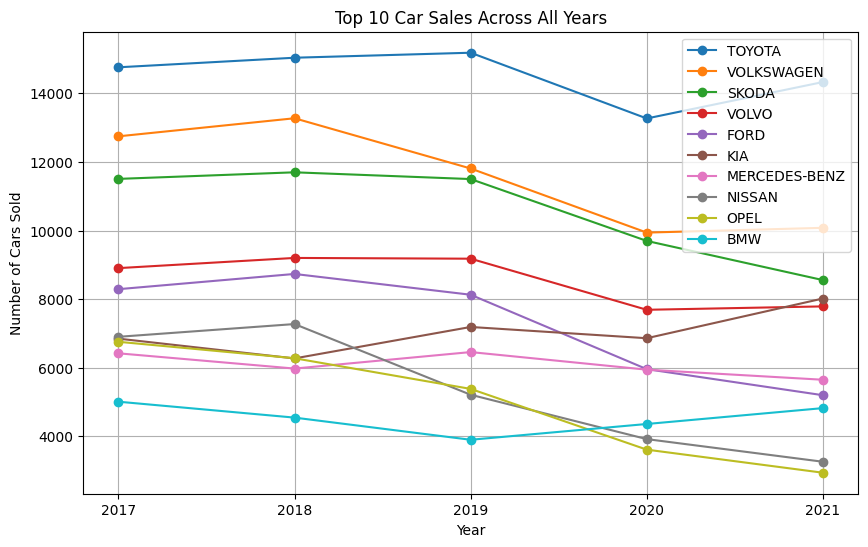

In [16]:
# Sum the sales across all years

#df['Total'] = df[str(df.columns.values)].sum(axis=1)
df['Total'] = df[df.columns[1:]].sum(axis=1)

# Sort the DataFrame based on the total sales and select the top 10
df_sorted = df.sort_values(by='Total', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))

for index, row in df_sorted.iterrows():
    plt.plot(df.columns[1:-1], row[1:-1], marker='o', label=row['merkki'])

plt.title('Top 10 Car Sales Across All Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.grid(True)
plt.show()

Visualisoidaan myös suhteellista muutosta, jolloin on helpompi nähdä yksittäisten merkkien trendit

    2017      2018      2019      2020      2021      merkki
75   NaN  0.018904  0.009709 -0.126251  0.080048      TOYOTA
78   NaN  0.041346 -0.110374 -0.158283  0.013985  VOLKSWAGEN
..   ...       ...       ...       ...       ...         ...
57   NaN -0.071058 -0.142470 -0.329121 -0.186427        OPEL
5    NaN -0.092652 -0.142165  0.118009  0.106241         BMW

[10 rows x 6 columns]


TypeError: 'value' must be an instance of str or bytes, not a int

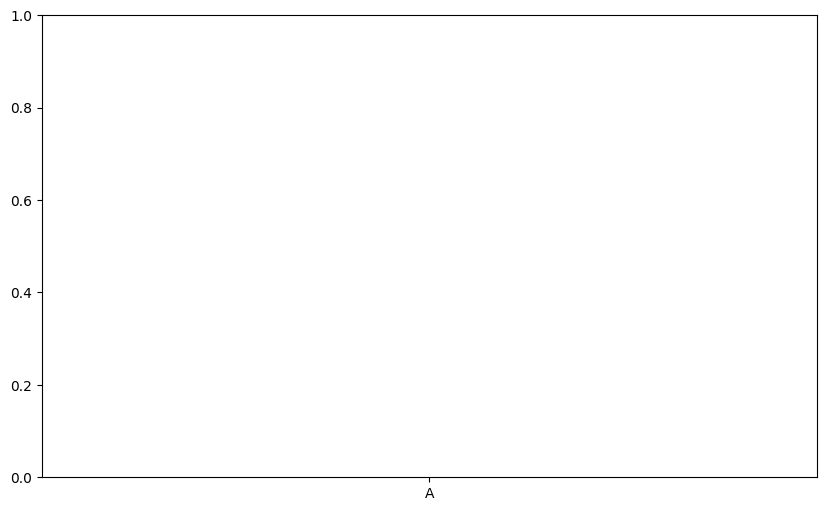

In [26]:
df_sorted
merkit = df_sorted["merkki"].values

df_pc_changes = df_sorted.drop(columns=["merkki", "Total"]).transpose().pct_change()

df_pc_changes = df_pc_changes.transpose()
df_pc_changes["merkki"]= merkit

print(df_pc_changes)


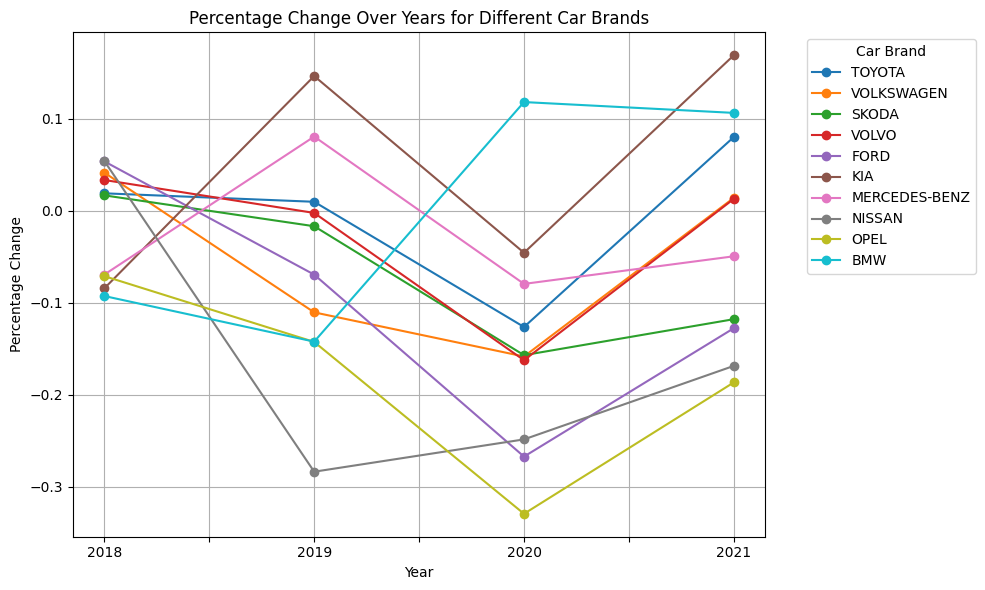

In [28]:
# Set the 'merkki' column as the index (assuming it represents the categories)
df_pc_changes.set_index('merkki', inplace=True)

# Transpose the DataFrame for easier plotting
df_transposed = df_pc_changes.transpose()

# Plot the data
plt.figure(figsize=(10, 6))
df_transposed.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Percentage Change Over Years for Different Car Brands')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Car Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Create a sample DataFrame
data = {'A': [10, 15, 20, 25, 30], 'B': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)
print(df)
# Calculate the percentage change for each column
percentage_change = df.pct_change()

# Display the result
print(percentage_change)

    A   B
0  10   5
1  15  10
2  20  15
3  25  20
4  30  25
          A         B
0       NaN       NaN
1  0.500000  1.000000
2  0.333333  0.500000
3  0.250000  0.333333
4  0.200000  0.250000


In [ ]:
vuodet = df.columns[1:-1][::-1]
merkit = df_sorted["merkki"].values
print(merkit)

for merkki in merkit:
    df_slice = df[df["merkki"] == merkki]
    print(df_slice)

In [63]:
for brands, values in df_sorted.items():
    for i in range(len(df_sorted.columns[1:-1][::-1]) - 1):
        values = df_sorted[df_sorted["merkki"] == values[i]]
        old_value = values[i + 1] # value in the previous year
        new_value = values[i]  # value in the current year
        print(new_value)
        rate_of_change = ((int(new_value) - int(old_value)) / int(old_value)) * 100

        print(f"{brand} ({years[i + 1]}-{years[i]}): {rate_of_change:.2f}%")

KeyError: 0

In [43]:
# Create a new DataFrame to store the rate of change
rate_df = pd.DataFrame(columns=['merkki'] + [f'rate_{i}_{i+1}' for i in range(len(df.columns) - 2)])
rate_df

,merkki,rate_0_1,rate_1_2,rate_2_3,rate_3_4,rate_4_5


In [ ]:
df = pd.read_csv('Ajoneuvojen_avoin_data_5_21.csv', encoding='ISO-8859-1', on_bad_lines="skip", delimiter=";",low_memory=False)

Otetaan dataa 2010 luvulta eteenpäin

In [ ]:
df['ensirekisterointipvm'] = pd.to_datetime(df['ensirekisterointipvm'])
df = df[df['ensirekisterointipvm'] > '2010-01-01']

Otetaan pelkästään M1 ajoneuvoluokan arvot eli henkilöautot

In [ ]:
df = df[df['ajoneuvoluokka'] == 'M1']

In [ ]:
df

In [ ]:
value_counts_series = df['merkkiSelvakielinen'].dropna().value_counts()
values_to_keep = value_counts_series[value_counts_series > 30000].index
df = df[df['merkkiSelvakielinen'].isin(values_to_keep)]

In [ ]:
df['merkkiSelvakielinen'].dropna().nunique()

In [ ]:
df['merkkiSelvakielinen'].dropna().value_counts()

In [ ]:
plt.figure(figsize=(20, 8))
value_counts = df['merkkiSelvakielinen'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Amount of registered vehicles for every brand with over 30 000 registered vehicles')
plt.show()

In [ ]:

brand_df = df[df['merkkiSelvakielinen'] == 'Volvo']
brand_df['Year'] = (brand_df['ensirekisterointipvm']).dt.year
brand_counts = brand_df.groupby('Year').size()
# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(brand_counts.index, brand_counts.values, marker='o', linestyle='-')
plt.title('First Registrations for Volvo per year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()